<a href="https://colab.research.google.com/github/mephi82/grad_data_analysis/blob/main/grid_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import random

import matplotlib.pyplot as plt
from matplotlib import colors

n = 4



In [15]:
class Environment:
    def __init__(self, n, actions, rewards, e_x, e_y):
        self.n = n
        self.actions = actions
        self.rewards = rewards
        self.e_x = e_x
        self.e_y = e_y

def build_grid(n):
    """Build an NxN grid with start and end cells, as well as some barrier cells.
    Args:
        n (int): length and width of the grid
        p_barrier (float): probability of a cell being a barrier
        r_barrier (int): reward for the barrier cells
    Returns:
        env (Environment): grid world environment
    """

    # Define set of possible actions: go left (0), up (1), right (2) or down (4)
    actions = [0, 1, 2, 3]

    # Define start and end cells -> these will have value 0
    e_x = random.randrange(n)
    e_y = random.randrange(n)

    # Define barrier cells -> these will have barrier reward. All other have -1 reward
    rewards = (-1) * np.ones((n, n))

    # Create environment
    env = Environment(n, actions, rewards, e_x, e_y)

    return env

def get_next_state(x, y, a, n):
    """Computes next state from current state and action.
    Args:
        x (int): x value of the current state
        y (int): y value of the current state
        a (int): action
        n (int): length and width of the grid
    Returns:
        s_prime_x (int): x value of the next state
        s_prime_y (int): y value of the next state
    """

    # Compute next state according to the action
    if a == 0:
        s_prime_x = x
        s_prime_y = max(0, y - 1)
    elif a == 1:
        s_prime_x = max(0, x - 1)
        s_prime_y = y
    elif a == 2:
        s_prime_x = x
        s_prime_y = min(n - 1, y + 1)
    else:
        s_prime_x = min(n - 1, x + 1)
        s_prime_y = y

    return s_prime_x, s_prime_y

def plot_grid(env):
    """Plot grid
    Args:
        env (Environment): grid world environment
    """

    data = env.rewards.copy()
    data[env.e_x, env.e_y] = 10

    # create discrete colormap
    cmap = colors.ListedColormap(['grey', 'white', 'red'])
    bounds = [-11, -2, 0, 12]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(data, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-.5, env.n, 1))
    ax.set_yticks(np.arange(-.5, env.n, 1))

    plt.show()

def plot_v_values(v, n):
    """Plots the value function in each state as a grid.
    Args:
        v (array): numpy array representing the value function
        n (int):
    """

    fig, ax = plt.subplots()
    im = ax.imshow(v, cmap='YlOrBr', interpolation='nearest')

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-.5, n, 1))
    ax.set_yticks(np.arange(-.5, n, 1))

    # Loop over data dimensions and create text annotations.
    for i in range(n):
        for j in range(n):
            text = ax.text(j, i, "{:.2f}".format(v[i, j]), ha="center", va="center", color="black")

    ax.set_title("Value function")
    fig.tight_layout()
    plt.show() 

def get_arrow(prob_arr):
    """Returns the arrows that represent the highest probability actions.
    Args:
        prob_arr (array): numpy array denoting the probability of taking each action on a given state
    Returns:
        arrow (str): string denoting the most probable action(s)
    """

    best_actions = np.where(prob_arr == np.amax(prob_arr))[0]
    if len(best_actions) == 1:
        if 0 in best_actions:
            return r"$\leftarrow$"
        if 1 in best_actions:
            return r"$\uparrow$"
        if 2 in best_actions:
            return r"$\rightarrow$"
        else:
            return r"$\downarrow$"

    elif len(best_actions) == 2:
        if 0 in best_actions and 1 in best_actions:
            return r"$\leftarrow \uparrow$"
        elif 0 in best_actions and 2 in best_actions:
            return r"$\leftrightarrow$"
        elif 0 in best_actions and 3 in best_actions:
            return r"$\leftarrow \downarrow$"
        elif 1 in best_actions and 2 in best_actions:
            return r"$\uparrow \rightarrow$"
        elif 1 in best_actions and 3 in best_actions:
            return r"$\updownarrow$"
        elif 2 in best_actions and 3 in best_actions:
            return r"$\downarrow \rightarrow$"

    elif len(best_actions) == 3:
        if 0 not in best_actions:
            return r"$\updownarrow \rightarrow$"
        elif 1 not in best_actions:
            return r"$\leftrightarrow \downarrow$"
        elif 2 not in best_actions:
            return r"$\leftarrow \updownarrow$"
        else:
            return r"$\leftrightarrow \uparrow$"

    else:
        return r"$\leftrightarrow \updownarrow$"


def plot_optimal_actions(env, pi):
    """Plots the optimal action to take in each state
    Args:
        env (Environment): grid world environment
        pi (array): numpy array indicating the probability of taking each action in each state
    """

    data = env.rewards.copy()
    data[env.e_x, env.e_y] = 10

    # create discrete colormap
    cmap = colors.ListedColormap(['grey', 'white', 'red'])
    bounds = [-11, -2, 0, 12]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(data, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-.5, env.n, 1))
    ax.set_yticks(np.arange(-.5, env.n, 1))

    # Loop over data dimensions and create text annotations.
    for i in range(env.n):
        for j in range(env.n):
            arrow = get_arrow(pi[i, j, :])
            text = ax.text(j, i, arrow, fontsize=16, ha="center", va="center", color="black")

    ax.set_title("Policy")
    fig.tight_layout()
    plt.show()   

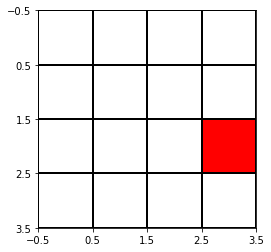

In [16]:
world = build_grid(4)
plot_grid(world)

In [17]:
def get_init_v(env, v0):
    """Defines initial value function v_0
    Args:
        n (int): length and width of the grid
        v0 (float): initial value for the value function (equal for every state)
        e_x (int): x value of the end cell
        e_y (int): y value of the end cell
    Returns:
        v0 (array): initial value function
    """
    n = env.n
    v0 = v0 * np.ones((n, n))

    # Value function of terminal state must be 0
    v0[env.e_x, env.e_y] = 0

    return v0

def get_equiprobable_policy(n):
    """Defines the equiprobable policy. Policy is a matrix s.t.
        pi[x, y, a] = Pr[A = a | S = (x,y)]
    Actions are:
        * 0: go left
        * 1: go up
        * 2: go right
        * 3: go down
    Args:
        n (int): length and width of the grid
    Returns:
        pi (array): numpy array representing the equiprobably policy
    """

    pi = 1/4 * np.ones((n, n, 4))
    return pi
    
def get_next_state(x, y, a, n):
    """Computes next state from current state and action.
    Args:
        x (int): x value of the current state
        y (int): y value of the current state
        a (int): action
        n (int): length and width of the grid
    Returns:
        s_prime_x (int): x value of the next state
        s_prime_y (int): y value of the next state
    """

    # Compute next state according to the action
    if a == 0:
        s_prime_x = x
        s_prime_y = max(0, y - 1)
    elif a == 1:
        s_prime_x = max(0, x - 1)
        s_prime_y = y
    elif a == 2:
        s_prime_x = x
        s_prime_y = min(n - 1, y + 1)
    else:
        s_prime_x = min(n - 1, x + 1)
        s_prime_y = y

    return s_prime_x, s_prime_y


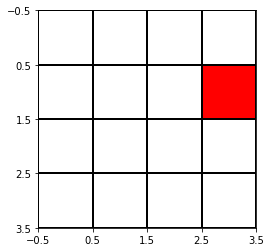

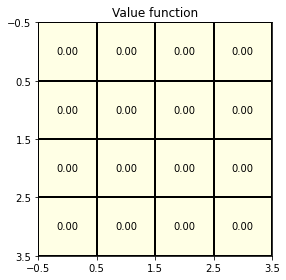

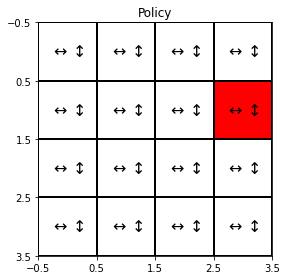

In [18]:
env = build_grid(n)
i = 0
plot_grid(env)

# Generate initial value function and policy
v = get_init_v(env, 0)
pi = get_equiprobable_policy(env.n)

# Plot initial value function and policy
plot_v_values(v, env.n)
plot_optimal_actions(env, pi)

# policy_stable = False
# while not policy_stable:
#     i += 1
#     print("\nIteration {} of Policy Iteration algorithm".format(i))
#     # Run the policy evaluation
#     policy_evaluation(env, v, pi, gamma, theta)
#     # Run the policy improvement algorithm
#     policy_stable = policy_improvement(env, v, pi, gamma)
#     plot_optimal_actions(env, pi)

# print("\nPolicy Iteration algorithm converged after {} steps".format(i))